In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False#这句代码解决待会画图出来  坐标轴负号乱码问题

In [2]:
data=pd.read_csv('/home/james/_AllDocMap/05_Dateset/Purchase-Redemption-Data/user_balance_table.csv',parse_dates=['report_date'])

data.info

<bound method DataFrame.info of          user_id report_date  tBalance  yBalance  total_purchase_amt  \
0              1  2014-08-05     20385     20383                   2   
1              1  2014-08-08     20391     20389                   2   
2              1  2014-08-11     20397     20395                   2   
3              1  2014-08-14     20403     20401                   2   
4              1  2014-08-17     20409     20407                   2   
...          ...         ...       ...       ...                 ...   
2840416    28033  2014-08-25    550646    550585                  61   
2840417    28033  2014-08-31    525707    538147                  60   
2840418    28033  2014-07-24  20487121  20484824                2297   
2840419    28033  2014-07-27  20462288  20491722                2298   
2840420    28035  2014-03-05         0         0                   0   

         direct_purchase_amt  purchase_bal_amt  purchase_bank_amt  \
0                          0      

In [3]:
data['report_date'].value_counts().sort_index()

2013-07-01      441
2013-07-02      480
2013-07-03      499
2013-07-04      523
2013-07-05      544
              ...  
2014-08-27    12527
2014-08-28    12557
2014-08-29    12596
2014-08-30    12603
2014-08-31    12614
Name: report_date, Length: 427, dtype: int64

In [4]:
total_balance=data.groupby(['report_date'])['total_purchase_amt','total_redeem_amt'].sum()
total_balance

/home/james/install/venv3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587
...,...,...
2014-08-27,302194801,468164147
2014-08-28,245082751,297893861
2014-08-29,267554713,273756380


In [11]:
purchase=total_balance[['total_purchase_amt']]
purchase

,total_purchase_amt
report_date,
2013-07-01,32488348
2013-07-02,29037390
2013-07-03,27270770
2013-07-04,18321185
2013-07-05,11648749
...,...
2014-08-27,302194801
2014-08-28,245082751
2014-08-29,267554713


In [6]:
redeem=total_balance[['total_redeem_amt']]
redeem

,total_redeem_amt
report_date,
2013-07-01,5525022
2013-07-02,2554548
2013-07-03,5953867
2013-07-04,6410729
2013-07-05,2763587
...,...
2014-08-27,468164147
2014-08-28,297893861
2014-08-29,273756380


/home/james/install/venv3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/james/install/venv3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21183 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/james/install/venv3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/james/install/venv3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/james/install/venv3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/james/install/venv3/lib/python3.6/site-packages/matplotlib/backe

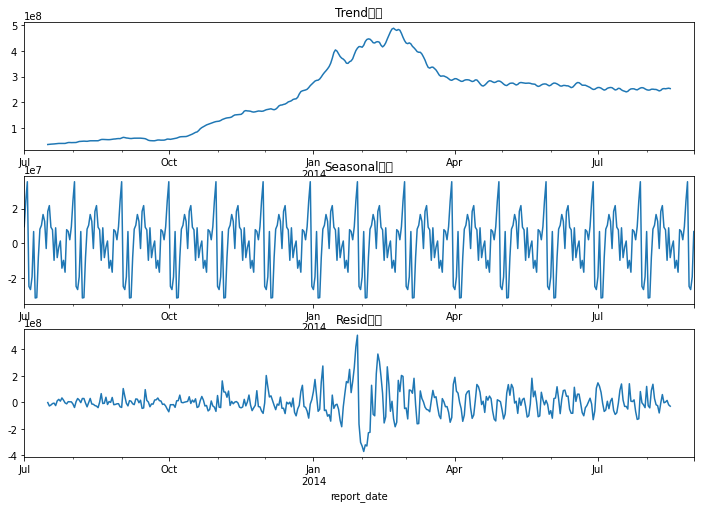

In [7]:
import statsmodels.api as sm

#指定区间范围内的数据,进行可视化
def plot_stl(data):
    #STL返回三个部分：trend(趋势),seasonal(季节),residual(残差)
    result=sm.tsa.seasonal_decompose(data,period=30)#我们的数据量只有从2013-07-01到2014-08-31一年多的数据量 而且我们要预测的仅仅是下一个月
    #所以这里的参数period=30 算是一个周期      如果像股票那样周期是年的  可以设置成200
    #可视化
    fig=plt.figure(figsize=(12,8))
    ax1=fig.add_subplot(311)
    ax2=fig.add_subplot(312)
    ax3=fig.add_subplot(313)
    #result里面包含三个部分 trend(趋势),seasonal(季节),residual(残差)
    result.trend.plot(ax=ax1,title='Trend趋势')
    result.seasonal.plot(ax=ax2,title='Seasonal季节')
    result.resid.plot(ax=ax3,title='Resid残差')
plot_stl(purchase['total_purchase_amt'])#这里三张图的横坐标都是表格中的日期类型  从2013年7月到2014年8月

/home/james/install/venv3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/james/install/venv3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21183 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/james/install/venv3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/james/install/venv3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/james/install/venv3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/james/install/venv3/lib/python3.6/site-packages/matplotlib/backe

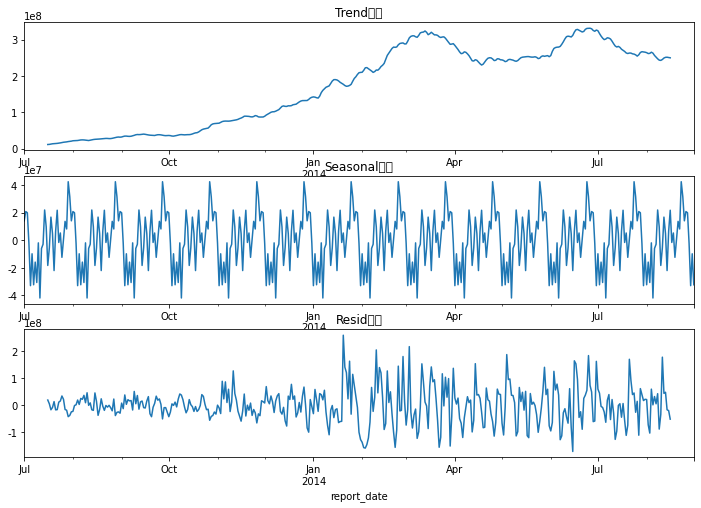

In [8]:
plot_stl(redeem['total_redeem_amt'])

In [12]:
purchase['ds']=purchase.index
purchase.rename(columns={'total_purchase_amt':'y'},inplace=True)#给字段改个名字 把 total_purchase_amt 换成y
purchase

,y,ds
report_date,,
2013-07-01,32488348,2013-07-01
2013-07-02,29037390,2013-07-02
2013-07-03,27270770,2013-07-03
2013-07-04,18321185,2013-07-04
2013-07-05,11648749,2013-07-05
...,...,...
2014-08-27,302194801,2014-08-27
2014-08-28,245082751,2014-08-28
2014-08-29,267554713,2014-08-29


In [13]:
redeem['ds']=redeem.index #同理也把这里的ds也给复制一下 prophet的保留字
redeem.rename(columns={'total_redeem_amt':'y'},inplace=True)#同时也给这个名字要预测的字段  redeem 总赎回量(消费+转出) 也给更改一下名字
redeem

,y,ds
report_date,,
2013-07-01,5525022,2013-07-01
2013-07-02,2554548,2013-07-02
2013-07-03,5953867,2013-07-03
2013-07-04,6410729,2013-07-04
2013-07-05,2763587,2013-07-05
...,...,...
2014-08-27,468164147,2014-08-27
2014-08-28,297893861,2014-08-28
2014-08-29,273756380,2014-08-29


In [14]:
purchase=purchase.reset_index(drop=True)
purchase

,y,ds
0,32488348,2013-07-01
1,29037390,2013-07-02
2,27270770,2013-07-03
3,18321185,2013-07-04
4,11648749,2013-07-05
...,...,...
422,302194801,2014-08-27
423,245082751,2014-08-28
424,267554713,2014-08-29
425,199708772,2014-08-30


In [15]:
redeem=redeem.reset_index(drop=True)
redeem

,y,ds
0,5525022,2013-07-01
1,2554548,2013-07-02
2,5953867,2013-07-03
3,6410729,2013-07-04
4,2763587,2013-07-05
...,...,...
422,468164147,2014-08-27
423,297893861,2014-08-28
424,273756380,2014-08-29
425,196374134,2014-08-30


In [16]:
from fbprophet import Prophet#导入模型

#构造Prophet模型  weekly_seasonality=True表示周期为周的季节性 n_changepoints=300指定突变点的个数
model=Prophet(weekly_seasonality=True,seasonality_prior_scale=0.1,n_changepoints=100)
model.fit(purchase)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future=model.make_future_dataframe(periods=30)
purchase_pred=model.predict(future)
purchase_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-3.078330e+06,-7.674728e+07,1.581611e+08,-3.078330e+06,-3.078330e+06,4.480732e+07,4.480732e+07,4.480732e+07,4.480732e+07,4.480732e+07,4.480732e+07,0.0,0.0,0.0,4.172899e+07
1,2013-07-02,-2.116643e+06,-6.860774e+07,1.585874e+08,-2.116643e+06,-2.116643e+06,4.755145e+07,4.755145e+07,4.755145e+07,4.755145e+07,4.755145e+07,4.755145e+07,0.0,0.0,0.0,4.543481e+07
2,2013-07-03,-1.154956e+06,-8.085061e+07,1.471882e+08,-1.154956e+06,-1.154956e+06,3.765934e+07,3.765934e+07,3.765934e+07,3.765934e+07,3.765934e+07,3.765934e+07,0.0,0.0,0.0,3.650438e+07
3,2013-07-04,-1.932683e+05,-1.094083e+08,1.393371e+08,-1.932683e+05,-1.932683e+05,1.948728e+07,1.948728e+07,1.948728e+07,1.948728e+07,1.948728e+07,1.948728e+07,0.0,0.0,0.0,1.929402e+07
4,2013-07-05,7.684189e+05,-1.360808e+08,9.079615e+07,7.684189e+05,7.684189e+05,-1.787372e+07,-1.787372e+07,-1.787372e+07,-1.787372e+07,-1.787372e+07,-1.787372e+07,0.0,0.0,0.0,-1.710530e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.003014e+08,5.855525e+07,2.975736e+08,1.975975e+08,2.027878e+08,-1.787372e+07,-1.787372e+07,-1.787372e+07,-1.787372e+07,-1.787372e+07,-1.787372e+07,0.0,0.0,0.0,1.824277e+08
453,2014-09-27,1.995536e+08,1.839277e+07,2.501011e+08,1.966981e+08,2.022232e+08,-6.946066e+07,-6.946066e+07,-6.946066e+07,-6.946066e+07,-6.946066e+07,-6.946066e+07,0.0,0.0,0.0,1.300929e+08
454,2014-09-28,1.988058e+08,2.147581e+07,2.451145e+08,1.957363e+08,2.016366e+08,-6.217102e+07,-6.217102e+07,-6.217102e+07,-6.217102e+07,-6.217102e+07,-6.217102e+07,0.0,0.0,0.0,1.366348e+08
455,2014-09-29,1.980580e+08,1.176744e+08,3.563385e+08,1.947840e+08,2.010686e+08,4.480732e+07,4.480732e+07,4.480732e+07,4.480732e+07,4.480732e+07,4.480732e+07,0.0,0.0,0.0,2.428653e+08


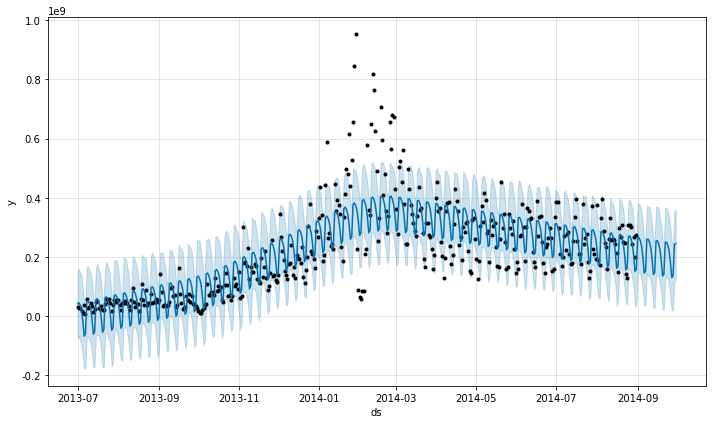

In [18]:
_=model.plot(purchase_pred)

In [19]:
model2=Prophet(weekly_seasonality=True,seasonality_prior_scale=0.1,n_changepoints=100)
model2.fit(redeem)
#预测未来1个月，9月份30天
future=model2.make_future_dataframe(periods=30)
redeem_pred=model2.predict(future)
redeem_pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-1.874400e+07,-5.813423e+07,1.168027e+08,-1.874400e+07,-1.874400e+07,4.902028e+07,4.902028e+07,4.902028e+07,4.902028e+07,4.902028e+07,4.902028e+07,0.0,0.0,0.0,3.027628e+07
1,2013-07-02,-1.795744e+07,-8.275664e+07,8.383224e+07,-1.795744e+07,-1.795744e+07,2.276790e+07,2.276790e+07,2.276790e+07,2.276790e+07,2.276790e+07,2.276790e+07,0.0,0.0,0.0,4.810463e+06
2,2013-07-03,-1.717087e+07,-7.725630e+07,8.971977e+07,-1.717087e+07,-1.717087e+07,2.490039e+07,2.490039e+07,2.490039e+07,2.490039e+07,2.490039e+07,2.490039e+07,0.0,0.0,0.0,7.729521e+06
3,2013-07-04,-1.638431e+07,-9.511677e+07,7.378564e+07,-1.638431e+07,-1.638431e+07,6.123265e+06,6.123265e+06,6.123265e+06,6.123265e+06,6.123265e+06,6.123265e+06,0.0,0.0,0.0,-1.026104e+07
4,2013-07-05,-1.559774e+07,-9.943150e+07,6.329045e+07,-1.559774e+07,-1.559774e+07,-4.525417e+06,-4.525417e+06,-4.525417e+06,-4.525417e+06,-4.525417e+06,-4.525417e+06,0.0,0.0,0.0,-2.012316e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.917496e+08,1.974035e+08,3.791115e+08,2.907877e+08,2.927259e+08,-4.525417e+06,-4.525417e+06,-4.525417e+06,-4.525417e+06,-4.525417e+06,-4.525417e+06,0.0,0.0,0.0,2.872242e+08
453,2014-09-27,2.919205e+08,1.464164e+08,3.213680e+08,2.909117e+08,2.929518e+08,-5.850357e+07,-5.850357e+07,-5.850357e+07,-5.850357e+07,-5.850357e+07,-5.850357e+07,0.0,0.0,0.0,2.334169e+08
454,2014-09-28,2.920914e+08,1.701446e+08,3.379119e+08,2.910406e+08,2.931877e+08,-3.978284e+07,-3.978284e+07,-3.978284e+07,-3.978284e+07,-3.978284e+07,-3.978284e+07,0.0,0.0,0.0,2.523086e+08
455,2014-09-29,2.922624e+08,2.510179e+08,4.190347e+08,2.911608e+08,2.934222e+08,4.902028e+07,4.902028e+07,4.902028e+07,4.902028e+07,4.902028e+07,4.902028e+07,0.0,0.0,0.0,3.412826e+08


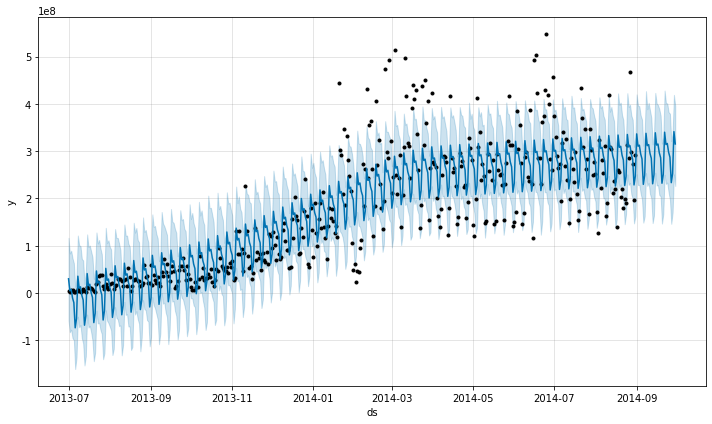

In [20]:
_=model2.plot(redeem_pred)

In [21]:
purchase_pred[(purchase_pred['ds']>='2014-09-01')&(purchase_pred['ds']<='2014-09-30')]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
427,2014-09-01,2.189960e+08,1.494748e+08,3.774293e+08,2.189960e+08,2.189961e+08,4.480732e+07,4.480732e+07,4.480732e+07,4.480732e+07,4.480732e+07,4.480732e+07,0.0,0.0,0.0,2.638033e+08
428,2014-09-02,2.182482e+08,1.489294e+08,3.812612e+08,2.182310e+08,2.182767e+08,4.755145e+07,4.755145e+07,4.755145e+07,4.755145e+07,4.755145e+07,4.755145e+07,0.0,0.0,0.0,2.657996e+08
429,2014-09-03,2.175004e+08,1.401597e+08,3.708850e+08,2.174467e+08,2.175702e+08,3.765934e+07,3.765934e+07,3.765934e+07,3.765934e+07,3.765934e+07,3.765934e+07,0.0,0.0,0.0,2.551597e+08
430,2014-09-04,2.167526e+08,1.199228e+08,3.540107e+08,2.166524e+08,2.168732e+08,1.948728e+07,1.948728e+07,1.948728e+07,1.948728e+07,1.948728e+07,1.948728e+07,0.0,0.0,0.0,2.362399e+08
431,2014-09-05,2.160048e+08,8.197275e+07,3.071542e+08,2.158503e+08,2.161874e+08,-1.787372e+07,-1.787372e+07,-1.787372e+07,-1.787372e+07,-1.787372e+07,-1.787372e+07,0.0,0.0,0.0,1.981311e+08
432,2014-09-06,2.152570e+08,3.664055e+07,2.542459e+08,2.150377e+08,2.154967e+08,-6.946066e+07,-6.946066e+07,-6.946066e+07,-6.946066e+07,-6.946066e+07,-6.946066e+07,0.0,0.0,0.0,1.457964e+08
433,2014-09-07,2.145093e+08,3.514933e+07,2.695468e+08,2.142043e+08,2.148144e+08,-6.217102e+07,-6.217102e+07,-6.217102e+07,-6.217102e+07,-6.217102e+07,-6.217102e+07,0.0,0.0,0.0,1.523382e+08
434,2014-09-08,2.137615e+08,1.445958e+08,3.722549e+08,2.133651e+08,2.141504e+08,4.480732e+07,4.480732e+07,4.480732e+07,4.480732e+07,4.480732e+07,4.480732e+07,0.0,0.0,0.0,2.585688e+08
435,2014-09-09,2.130137e+08,1.365998e+08,3.708338e+08,2.125334e+08,2.134890e+08,4.755145e+07,4.755145e+07,4.755145e+07,4.755145e+07,4.755145e+07,4.755145e+07,0.0,0.0,0.0,2.605651e+08
436,2014-09-10,2.122659e+08,1.313026e+08,3.679823e+08,2.116824e+08,2.128275e+08,3.765934e+07,3.765934e+07,3.765934e+07,3.765934e+07,3.765934e+07,3.765934e+07,0.0,0.0,0.0,2.499252e+08


In [22]:
purchase2=purchase_pred[(purchase_pred['ds']>='2014-09-01')&(purchase_pred['ds']<='2014-09-30')][['ds','yhat']]#ds是时间列 yhat是预测值
purchase2

,ds,yhat
427,2014-09-01,2.638033e+08
428,2014-09-02,2.657996e+08
429,2014-09-03,2.551597e+08
430,2014-09-04,2.362399e+08
431,2014-09-05,1.981311e+08
432,2014-09-06,1.457964e+08
433,2014-09-07,1.523382e+08
434,2014-09-08,2.585688e+08
435,2014-09-09,2.605651e+08
436,2014-09-10,2.499252e+08


In [23]:
redeem2=redeem_pred[(redeem_pred['ds']>='2014-09-01')&(redeem_pred['ds']<='2014-09-30')][['ds','yhat']]
redeem2

,ds,yhat
427,2014-09-01,3.364968e+08
428,2014-09-02,3.104154e+08
429,2014-09-03,3.127188e+08
430,2014-09-04,2.941126e+08
431,2014-09-05,2.836348e+08
432,2014-09-06,2.298276e+08
433,2014-09-07,2.487192e+08
434,2014-09-08,3.376933e+08
435,2014-09-09,3.116118e+08
436,2014-09-10,3.139152e+08


In [25]:
result=pd.DataFrame()#一个空的df
result['ds']=purchase2['ds']#然后把时间放进去
result['purchase_amt']=purchase2['yhat']#把总购买量放进去
result['redeem_amt']=redeem2['yhat']#把总赎回量放进去
result

,ds,purchase_amt,redeem_amt
427,2014-09-01,2.638033e+08,3.364968e+08
428,2014-09-02,2.657996e+08,3.104154e+08
429,2014-09-03,2.551597e+08,3.127188e+08
430,2014-09-04,2.362399e+08,2.941126e+08
431,2014-09-05,1.981311e+08,2.836348e+08
432,2014-09-06,1.457964e+08,2.298276e+08
433,2014-09-07,1.523382e+08,2.487192e+08
434,2014-09-08,2.585688e+08,3.376933e+08
435,2014-09-09,2.605651e+08,3.116118e+08
436,2014-09-10,2.499252e+08,3.139152e+08


In [26]:
result.to_csv('n_prophet.csv',header=None,index=False)

In [27]:
result['ds']=result['ds'].apply(lambda x:str(x).replace('-',''))
result

,ds,purchase_amt,redeem_amt
427,20140901 00:00:00,2.638033e+08,3.364968e+08
428,20140902 00:00:00,2.657996e+08,3.104154e+08
429,20140903 00:00:00,2.551597e+08,3.127188e+08
430,20140904 00:00:00,2.362399e+08,2.941126e+08
431,20140905 00:00:00,1.981311e+08,2.836348e+08
432,20140906 00:00:00,1.457964e+08,2.298276e+08
433,20140907 00:00:00,1.523382e+08,2.487192e+08
434,20140908 00:00:00,2.585688e+08,3.376933e+08
435,20140909 00:00:00,2.605651e+08,3.116118e+08
436,20140910 00:00:00,2.499252e+08,3.139152e+08


In [28]:
result['ds']=result['ds'].apply(lambda x:str(x).replace('-','')[0:8])
result

,ds,purchase_amt,redeem_amt
427,20140901,2.638033e+08,3.364968e+08
428,20140902,2.657996e+08,3.104154e+08
429,20140903,2.551597e+08,3.127188e+08
430,20140904,2.362399e+08,2.941126e+08
431,20140905,1.981311e+08,2.836348e+08
432,20140906,1.457964e+08,2.298276e+08
433,20140907,1.523382e+08,2.487192e+08
434,20140908,2.585688e+08,3.376933e+08
435,20140909,2.605651e+08,3.116118e+08
436,20140910,2.499252e+08,3.139152e+08


In [29]:
result.to_csv('n_prophet.csv',header=None,index=False)